In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
import random

In [2]:
X,y = make_classification(n_features = 5, n_redundant = 0, n_informative = 5, n_clusters_per_class = 1)

In [4]:
df = pd.DataFrame(X, columns = ['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y
print("Shape of the Dataframe: ", df.shape)
df.head()

Shape of the Dataframe:  (100, 6)


,col1,col2,col3,col4,col5,target
0,-1.927997,0.465759,-0.850918,1.937748,0.373654,0
1,-0.195333,1.255330,-0.045867,2.884890,-1.023029,1
2,-0.059535,-0.807111,1.821250,1.463259,0.551769,1
3,-2.815760,1.400784,-0.158624,-1.644197,0.295511,0
4,-1.609886,0.159378,2.471319,0.112311,1.600523,0


## Function for Row Sampling

In [8]:
def row_sampling(df, percent):
  return df.sample(int(percent * df.shape[0]), replace = True)

## Function for Feature Sampling or Column Sampling

In [12]:
def feature_sampling(df, percent):
  cols = random.sample(df.columns.tolist()[:-1], int(percent * (df.shape[1] - 1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

## Function for Combined Sampling
Combined = Row + Column


In [13]:
def combined_sampling(df,row_percent,col_percent):
  new_df = row_sampling(df,row_percent)
  return feature_sampling(new_df,col_percent)

## Random Forest

Random forest is nothing but collection of datasets. So we will make 3 decision trees and in that we will make 3 datasets randomly.

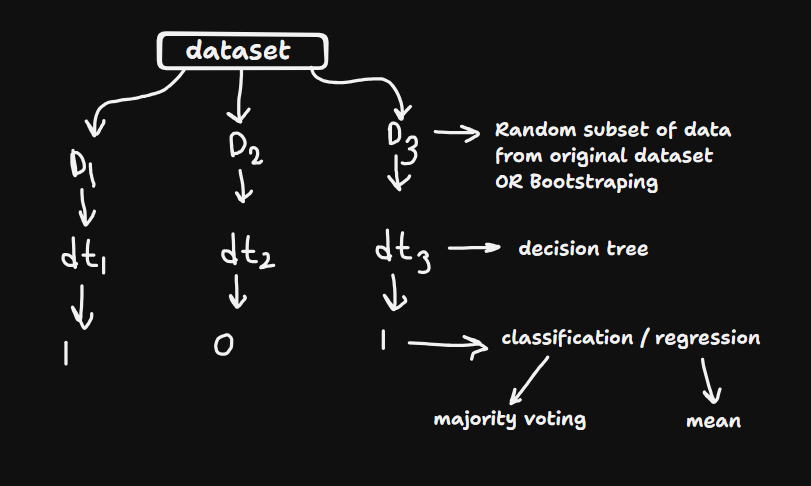

## Bootstraping OR Random subset of data using Row Sampling

In [21]:
bootstrap_row_sampling_1 = row_sampling(df, 0.1)
print("Shape of the first new random dataset (Row Sampling): ", bootstrap_row_sampling_1.shape)
bootstrap_row_sampling_1.head()

Shape of the first new random dataset (Row Sampling):  (10, 6)


,col1,col2,col3,col4,col5,target
33,-1.214723,2.719805,-1.428942,-0.125685,-0.196074,1
59,-1.140907,1.286620,2.207130,-0.042361,1.619373,0
69,-0.778161,1.090215,0.642177,3.127296,-0.093789,1
30,-0.846523,1.996830,3.829928,-1.695935,-0.637456,0
58,-2.355728,-0.050339,0.316030,-0.613832,-2.001352,0


In [22]:
bootstrap_row_sampling_2 = row_sampling(df, 0.1)
print("Shape of the second new random dataset (Row Sampling): ", bootstrap_row_sampling_2.shape)
bootstrap_row_sampling_2.head()

Shape of the second new random dataset (Row Sampling):  (10, 6)


,col1,col2,col3,col4,col5,target
92,-0.716477,0.434141,0.936208,1.563599,-2.143087,0
40,-1.846641,0.073501,1.171000,2.060584,-0.670690,1
79,-1.350627,2.386556,-0.592481,0.850281,-0.311644,1
19,-1.168675,-0.585160,0.738527,1.707626,-0.630661,0
43,-0.680581,2.570498,1.964209,-0.141151,-0.163602,0


In [23]:
bootstrap_row_sampling_3 = row_sampling(df, 0.1)
print("Shape of the third new random dataset (Row Sampling): ", bootstrap_row_sampling_3.shape)
bootstrap_row_sampling_3.head()

Shape of the third new random dataset (Row Sampling):  (10, 6)


,col1,col2,col3,col4,col5,target
50,-0.976297,1.762155,3.491909,-1.723636,-1.111944,0
75,-2.103503,1.833660,0.806636,1.506589,-0.304809,1
9,-1.256713,-0.790339,3.078389,0.715004,2.009492,1
8,-1.599412,2.421804,-0.026203,-0.426722,0.129645,1
89,-1.433626,2.052865,1.119921,-0.207069,2.613904,1


## Bootstraping OR Random subset of data using Column or Feature Sampling

In [24]:
bootstrap_feature_sampling_1 = feature_sampling(df, 0.5)
print("Shape of the first new random dataset (Feature/Column Sampling): ", bootstrap_feature_sampling_1.shape)
bootstrap_feature_sampling_1.head()

Shape of the first new random dataset (Feature/Column Sampling):  (100, 3)


<ipython-input-12-236ab99d2920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col2,target
0,-1.927997,0.465759,0
1,-0.195333,1.255330,1
2,-0.059535,-0.807111,1
3,-2.815760,1.400784,0
4,-1.609886,0.159378,0


In [25]:
bootstrap_feature_sampling_2 = feature_sampling(df, 0.5)
print("Shape of the second new random dataset (Feature/Column Sampling): ", bootstrap_feature_sampling_2.shape)
bootstrap_feature_sampling_2.head()

Shape of the second new random dataset (Feature/Column Sampling):  (100, 3)


<ipython-input-12-236ab99d2920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col5,col1,target
0,0.373654,-1.927997,0
1,-1.023029,-0.195333,1
2,0.551769,-0.059535,1
3,0.295511,-2.815760,0
4,1.600523,-1.609886,0


In [26]:
bootstrap_feature_sampling_3 = feature_sampling(df, 0.5)
print("Shape of the third new random dataset (Feature/Column Sampling): ", bootstrap_feature_sampling_3.shape)
bootstrap_feature_sampling_3.head()

Shape of the third new random dataset (Feature/Column Sampling):  (100, 3)


<ipython-input-12-236ab99d2920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col5,target
0,-1.927997,0.373654,0
1,-0.195333,-1.023029,1
2,-0.059535,0.551769,1
3,-2.815760,0.295511,0
4,-1.609886,1.600523,0


## Bootstraping OR Random subset of data using Combined Sampling

In [27]:
bootstrap_combined_sampling_1 = combined_sampling(df, 0.5, 0.5)
print("Shape of the first new random dataset (Combined Sampling): ", bootstrap_combined_sampling_1.shape)
bootstrap_combined_sampling_1.head()

Shape of the first new random dataset (Combined Sampling):  (50, 3)


<ipython-input-12-236ab99d2920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col5,col1,target
80,0.498933,-1.164410,0
15,-1.309295,0.170072,0
8,0.129645,-1.599412,1
95,0.499517,-1.474035,0
31,4.185119,-0.399563,1


In [28]:
bootstrap_combined_sampling_2 = combined_sampling(df, 0.5, 0.5)
print("Shape of the second new random dataset (Combined Sampling): ", bootstrap_combined_sampling_2.shape)
bootstrap_combined_sampling_2.head()

Shape of the second new random dataset (Combined Sampling):  (50, 3)


<ipython-input-12-236ab99d2920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col4,col1,target
48,1.510486,-1.521447,1
84,-0.185265,-0.985574,0
67,-0.899456,-0.909305,0
51,-0.813046,-0.665056,1
68,1.117169,-2.045375,0


In [29]:
bootstrap_combined_sampling_3 = combined_sampling(df, 0.5, 0.5)
print("Shape of the third new random dataset (Combined Sampling): ", bootstrap_combined_sampling_3.shape)
bootstrap_combined_sampling_3.head()

Shape of the third new random dataset (Combined Sampling):  (50, 3)


<ipython-input-12-236ab99d2920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col2,col1,target
71,-0.016478,-0.927042,0
33,2.719805,-1.214723,1
74,-0.929591,-0.527884,1
86,1.032817,-1.732691,0
51,3.084533,-0.665056,1


Now you can choose any three random one to get your results. We will choose the Random Row Sampling.

In [31]:
print("Columns of First Dataframe are: ", bootstrap_row_sampling_1.columns)
print("Columns of Second Dataframe are: ", bootstrap_row_sampling_2.columns)
print("Columns of Third Dataframeare: ", bootstrap_row_sampling_3.columns)

Columns of First Dataframe are:  Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Columns of Second Dataframe are:  Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Columns of Third Dataframeare:  Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')


## Applying Decision Tree Classifier

In [33]:
decision_tree_1 = DecisionTreeClassifier()
decision_tree_2 = DecisionTreeClassifier()
decision_tree_3 = DecisionTreeClassifier()

In [34]:
decision_tree_1.fit(df.iloc[:,0:2], df.iloc[:,-1])
decision_tree_2.fit(df.iloc[:,0:2], df.iloc[:,-1])
decision_tree_3.fit(df.iloc[:,0:2], df.iloc[:,-1])

DecisionTreeClassifier()

## Plotting the Decision Tree

[Text(0.6203703703703703, 0.9761904761904762, 'x[0] <= -0.054\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5833333333333334, 0.9285714285714286, 'x[1] <= 2.645\ngini = 0.498\nsamples = 94\nvalue = [44, 50]'),
 Text(0.6018518518518519, 0.9523809523809523, 'True  '),
 Text(0.5462962962962963, 0.8809523809523809, 'x[1] <= -1.155\ngini = 0.5\nsamples = 87\nvalue = [44.0, 43.0]'),
 Text(0.5092592592592593, 0.8333333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5833333333333334, 0.8333333333333334, 'x[0] <= -2.648\ngini = 0.498\nsamples = 83\nvalue = [44, 39]'),
 Text(0.5462962962962963, 0.7857142857142857, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6203703703703703, 0.7857142857142857, 'x[0] <= -0.979\ngini = 0.5\nsamples = 80\nvalue = [41, 39]'),
 Text(0.3888888888888889, 0.7380952380952381, 'x[1] <= 1.598\ngini = 0.494\nsamples = 54\nvalue = [24, 30]'),
 Text(0.2962962962962963, 0.6904761904761905, 'x[0] <= -1.101\ngini = 0.497\nsamples = 39\nvalue = [

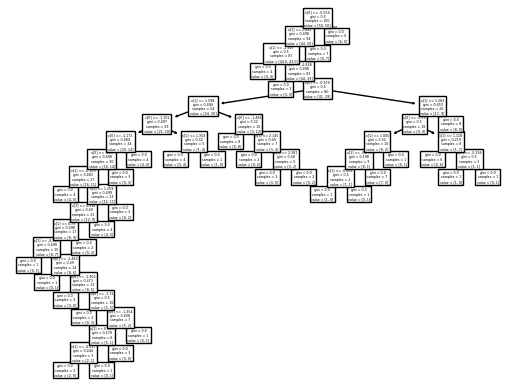

In [35]:
plot_tree(decision_tree_1)

[Text(0.6203703703703703, 0.9761904761904762, 'x[0] <= -0.054\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5833333333333334, 0.9285714285714286, 'x[1] <= 2.645\ngini = 0.498\nsamples = 94\nvalue = [44, 50]'),
 Text(0.6018518518518519, 0.9523809523809523, 'True  '),
 Text(0.5462962962962963, 0.8809523809523809, 'x[1] <= -1.155\ngini = 0.5\nsamples = 87\nvalue = [44.0, 43.0]'),
 Text(0.5092592592592593, 0.8333333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5833333333333334, 0.8333333333333334, 'x[0] <= -2.648\ngini = 0.498\nsamples = 83\nvalue = [44, 39]'),
 Text(0.5462962962962963, 0.7857142857142857, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6203703703703703, 0.7857142857142857, 'x[0] <= -0.979\ngini = 0.5\nsamples = 80\nvalue = [41, 39]'),
 Text(0.3888888888888889, 0.7380952380952381, 'x[1] <= 1.598\ngini = 0.494\nsamples = 54\nvalue = [24, 30]'),
 Text(0.2962962962962963, 0.6904761904761905, 'x[0] <= -1.101\ngini = 0.497\nsamples = 39\nvalue = [

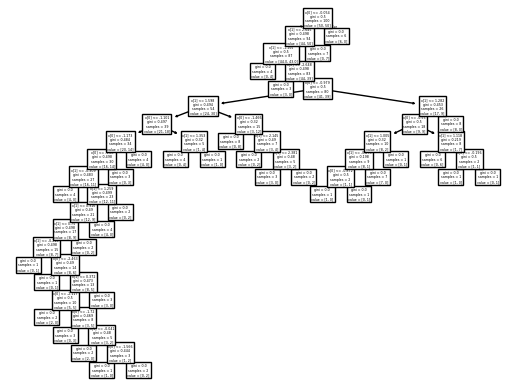

In [36]:
plot_tree(decision_tree_2)

[Text(0.6203703703703703, 0.975, 'x[0] <= -0.054\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5833333333333334, 0.925, 'x[1] <= 2.645\ngini = 0.498\nsamples = 94\nvalue = [44, 50]'),
 Text(0.6018518518518519, 0.95, 'True  '),
 Text(0.5462962962962963, 0.875, 'x[1] <= -1.155\ngini = 0.5\nsamples = 87\nvalue = [44.0, 43.0]'),
 Text(0.5092592592592593, 0.825, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5833333333333334, 0.825, 'x[0] <= -2.648\ngini = 0.498\nsamples = 83\nvalue = [44, 39]'),
 Text(0.5462962962962963, 0.775, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6203703703703703, 0.775, 'x[0] <= -0.979\ngini = 0.5\nsamples = 80\nvalue = [41, 39]'),
 Text(0.3888888888888889, 0.725, 'x[1] <= 1.598\ngini = 0.494\nsamples = 54\nvalue = [24, 30]'),
 Text(0.2962962962962963, 0.675, 'x[0] <= -1.101\ngini = 0.497\nsamples = 39\nvalue = [21, 18]'),
 Text(0.2222222222222222, 0.625, 'x[0] <= -1.173\ngini = 0.484\nsamples = 34\nvalue = [20, 14]'),
 Text(0.18518518518518

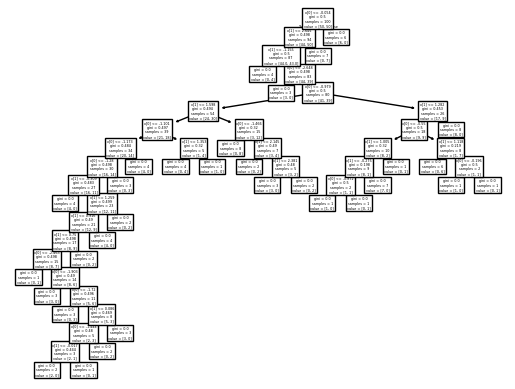

In [37]:
plot_tree(decision_tree_3)